# Importing modules

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2024-09-13 19:30:50.462448: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-13 19:30:53.017454: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-13 19:30:54.046256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-13 19:30:55.664102: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-13 19:30:56.004578: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-13 19:30:58.175245: I tensorflow/core/platform/cpu_feature_gu

# Download Dataset from kaggle

In [ ]:
!kaggle datasets download -d srijonashraf/maize-leaf-diseases-six-classes

Dataset URL: https://www.kaggle.com/datasets/srijonashraf/maize-leaf-diseases-six-classes
License(s): unknown
 85% 89.0M/104M [00:00<00:00, 156MB/s]
100% 104M/104M [00:00<00:00, 154MB/s] 


In [ ]:
!unzip maize-leaf-diseases-six-classes.zip && rm maize-leaf-diseases-six-classes.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Corn___Common_Rust/image (942).JPG  
  inflating: train/Corn___Common_Rust/image (943).JPG  
  inflating: train/Corn___Common_Rust/image (944).JPG  
  inflating: train/Corn___Common_Rust/image (945).JPG  
  inflating: train/Corn___Common_Rust/image (947).JPG  
  inflating: train/Corn___Common_Rust/image (948).JPG  
  inflating: train/Corn___Common_Rust/image (949).JPG  
  inflating: train/Corn___Common_Rust/image (95).JPG  
  inflating: train/Corn___Common_Rust/image (950).JPG  
  inflating: train/Corn___Common_Rust/image (952).JPG  
  inflating: train/Corn___Common_Rust/image (954).JPG  
  inflating: train/Corn___Common_Rust/image (955).JPG  
  inflating: train/Corn___Common_Rust/image (956).JPG  
  inflating: train/Corn___Common_Rust/image (958).JPG  
  inflating: train/Corn___Common_Rust/image (959).JPG  
  inflating: train/Corn___Common_Rust/image (960).JPG  
  inflating: train/Corn___Common_Rust/image (962).JPG 

# Data Preprocessing

## Training images

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5940 files belonging to 6 classes.


## Validation images

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 660 files belonging to 6 classes.


# Building Model

In [4]:
cnn = tf.keras.models.Sequential()

## Add convolution Layers

In [5]:
cnn.add(tf.keras.layers.Input(shape=[128,128,3]))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))

# Compiling

In [12]:
# compiling
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │       301,062 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409,542 (5.38 MB)

 Trainable params: 1,409,542 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10, batch_size=None)

Epoch 1/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 762s 4s/step - accuracy: 0.9156 - loss: 0.2230 - val_accuracy: 0.9061 - val_loss: 0.2560
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 841s 4s/step - accuracy: 0.9470 - loss: 0.1405 - val_accuracy: 0.9258 - val_loss: 0.2139
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 812s 4s/step - accuracy: 0.9553 - loss: 0.1077 - val_accuracy: 0.9318 - val_loss: 0.2261
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 856s 4s/step - accuracy: 0.9664 - loss: 0.0935 - val_accuracy: 0.9303 - val_loss: 0.2244
Epoch 5/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 792s 4s/step - accuracy: 0.9784 - loss: 0.0627 - val_accuracy: 0.9121 - val_loss: 0.3153
Epoch 6/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 748s 4s/step - accuracy: 0.9774 - loss: 0.0709 - val_accuracy: 0.9091 - val_loss: 0.2773
Epoch 7/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 804s 4s/step - accuracy: 0.9804 - loss: 0.0564 - val_accuracy: 0.9455 - val_loss: 0.2253
Epoch 8/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 853s 4s/step - accuracy: 0.9767 - loss: 0.0570 - val_accu

# Evaluating Model

In [17]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

186/186 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9822 - loss: 0.0544
Training accuracy: 0.9861952662467957


In [18]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9316 - loss: 0.3227
Validation accuracy: 0.939393937587738


In [20]:
cnn.save('model3.keras')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.9134680032730103,
  0.941077470779419,
  0.9503366947174072,
  0.9661616086959839,
  0.9744107723236084,
  0.9755892157554626,
  0.9824915528297424,
  0.9767676591873169,
  0.9936026930809021,
  0.9818181991577148],
 'loss': [0.22522714734077454,
  0.1545739322900772,
  0.128128781914711,
  0.09536261111497879,
  0.07111842185258865,
  0.07320785522460938,
  0.04995662719011307,
  0.05832413211464882,
  0.02556612156331539,
  0.046899523586034775],
 'val_accuracy': [0.9060605764389038,
  0.9257575869560242,
  0.9318181872367859,
  0.9303030371665955,
  0.9121212363243103,
  0.9090909361839294,
  0.9454545378684998,
  0.9409090876579285,
  0.9409090876579285,
  0.939393937587738],
 'val_loss': [0.25598424673080444,
  0.21392813324928284,
  0.22610628604888916,
  0.2243843376636505,
  0.31530502438545227,
  0.2773200571537018,
  0.22525200247764587,
  0.21582208573818207,
  0.28321802616119385,
  0.2854174077510834]}

In [22]:
#Recording History in json
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history, f, indent=4)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Metrics Visualization

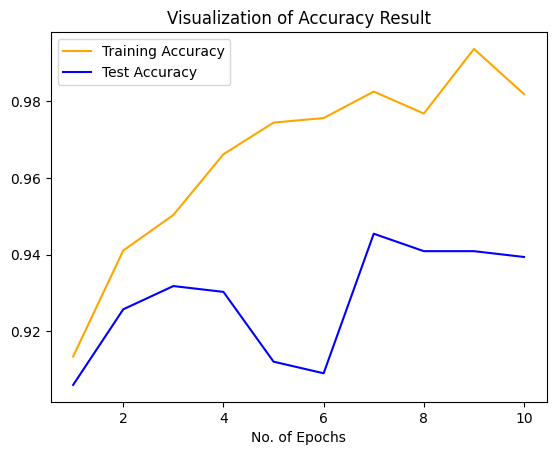

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='orange',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Test Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [25]:
class_names = validation_set.class_names
class_names

['Corn___Common_Rust',
 'Corn___Gray_Leaf_Spot',
 'Corn___Healthy',
 'Corn___Northern_Leaf_Blight',
 'Corn___Northern_Leaf_Spot',
 'Corn___Phaeosphaeria_Leaf_Spot']

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 660 files belonging to 6 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/MaizeDiseaseDetection/valid" /content/

In [36]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

  1/660 ━━━━━━━━━━━━━━━━━━━━ 57s 87ms/step

660/660 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step


In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2024-09-14 04:32:10.554665: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
Y_true


<tf.Tensor: shape=(660,), dtype=int64, numpy=
array([1, 2, 4, 4, 1, 5, 4, 4, 0, 4, 1, 0, 5, 4, 0, 5, 0, 2, 2, 3, 5, 3,
       5, 2, 2, 0, 1, 1, 1, 2, 4, 1, 3, 3, 1, 5, 2, 1, 5, 1, 2, 2, 2, 4,
       1, 3, 0, 0, 4, 3, 0, 2, 0, 2, 1, 5, 0, 3, 0, 3, 4, 3, 0, 5, 1, 5,
       0, 5, 5, 4, 0, 2, 2, 4, 4, 0, 2, 4, 4, 5, 5, 5, 1, 2, 1, 1, 3, 3,
       2, 4, 1, 5, 1, 4, 4, 1, 2, 1, 2, 3, 4, 4, 2, 1, 0, 3, 2, 3, 2, 1,
       4, 2, 4, 1, 1, 1, 3, 3, 3, 4, 3, 2, 4, 0, 0, 4, 5, 2, 2, 3, 1, 2,
       4, 1, 3, 3, 0, 0, 1, 4, 0, 1, 5, 1, 2, 5, 1, 1, 3, 5, 0, 4, 3, 0,
       3, 4, 1, 3, 2, 5, 1, 4, 0, 4, 3, 2, 5, 1, 2, 0, 0, 0, 2, 2, 2, 3,
       3, 1, 0, 5, 5, 3, 3, 2, 0, 0, 4, 0, 2, 3, 5, 2, 1, 3, 4, 1, 4, 5,
       5, 5, 5, 5, 3, 5, 1, 4, 0, 2, 3, 4, 4, 3, 1, 2, 3, 0, 0, 3, 4, 3,
       1, 1, 1, 3, 0, 5, 1, 3, 2, 2, 1, 4, 4, 2, 1, 0, 5, 4, 2, 5, 5, 0,
       3, 2, 3, 2, 4, 0, 1, 0, 5, 3, 5, 2, 4, 1, 0, 4, 2, 2, 1, 4, 3, 4,
       0, 4, 3, 5, 2, 4, 0, 3, 0, 3, 2, 4, 4, 2, 5, 1, 4, 3, 5, 3, 2, 4,
     

In [39]:
predicted_categories

<tf.Tensor: shape=(660,), dtype=int64, numpy=
array([2, 4, 4, 0, 0, 3, 3, 4, 0, 5, 5, 5, 0, 4, 0, 2, 5, 2, 4, 1, 2, 1,
       3, 2, 0, 1, 1, 1, 2, 4, 1, 4, 5, 3, 5, 1, 3, 5, 4, 1, 5, 1, 5, 2,
       1, 1, 1, 0, 2, 2, 2, 4, 3, 0, 0, 4, 2, 0, 0, 3, 0, 3, 0, 0, 4, 2,
       4, 5, 0, 3, 4, 0, 4, 5, 3, 5, 4, 2, 5, 5, 1, 5, 3, 2, 2, 3, 2, 2,
       2, 4, 5, 3, 1, 3, 4, 1, 2, 1, 4, 2, 1, 2, 0, 5, 1, 3, 3, 2, 2, 3,
       4, 4, 4, 4, 1, 3, 3, 0, 3, 1, 3, 2, 2, 4, 4, 3, 0, 4, 3, 0, 1, 0,
       2, 0, 3, 2, 3, 4, 2, 0, 5, 0, 1, 1, 3, 0, 5, 3, 5, 4, 3, 0, 0, 5,
       1, 1, 3, 5, 3, 2, 0, 2, 5, 3, 4, 0, 2, 3, 5, 2, 2, 0, 1, 5, 2, 5,
       2, 3, 1, 0, 3, 5, 0, 0, 5, 3, 4, 5, 5, 0, 2, 3, 3, 5, 3, 5, 4, 4,
       2, 0, 1, 1, 3, 3, 1, 3, 5, 4, 1, 0, 3, 3, 3, 4, 2, 4, 1, 0, 3, 1,
       5, 3, 3, 5, 2, 5, 2, 3, 1, 2, 1, 4, 5, 0, 4, 2, 0, 1, 2, 0, 5, 5,
       2, 0, 5, 0, 0, 0, 2, 4, 2, 3, 4, 3, 4, 0, 0, 3, 1, 2, 3, 4, 0, 4,
       2, 2, 3, 4, 2, 3, 5, 2, 4, 2, 0, 4, 1, 4, 4, 1, 2, 3, 5, 0, 0, 1,
     

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                precision    recall  f1-score   support

            Corn___Common_Rust       0.18      0.19      0.19       110
         Corn___Gray_Leaf_Spot       0.24      0.20      0.22       110
                Corn___Healthy       0.21      0.22      0.22       110
   Corn___Northern_Leaf_Blight       0.23      0.25      0.24       110
     Corn___Northern_Leaf_Spot       0.26      0.25      0.25       110
Corn___Phaeosphaeria_Leaf_Spot       0.18      0.19      0.19       110

                      accuracy                           0.22       660
                     macro avg       0.22      0.22      0.22       660
                  weighted avg       0.22      0.22      0.22       660



# Confusion Matrix Visualization

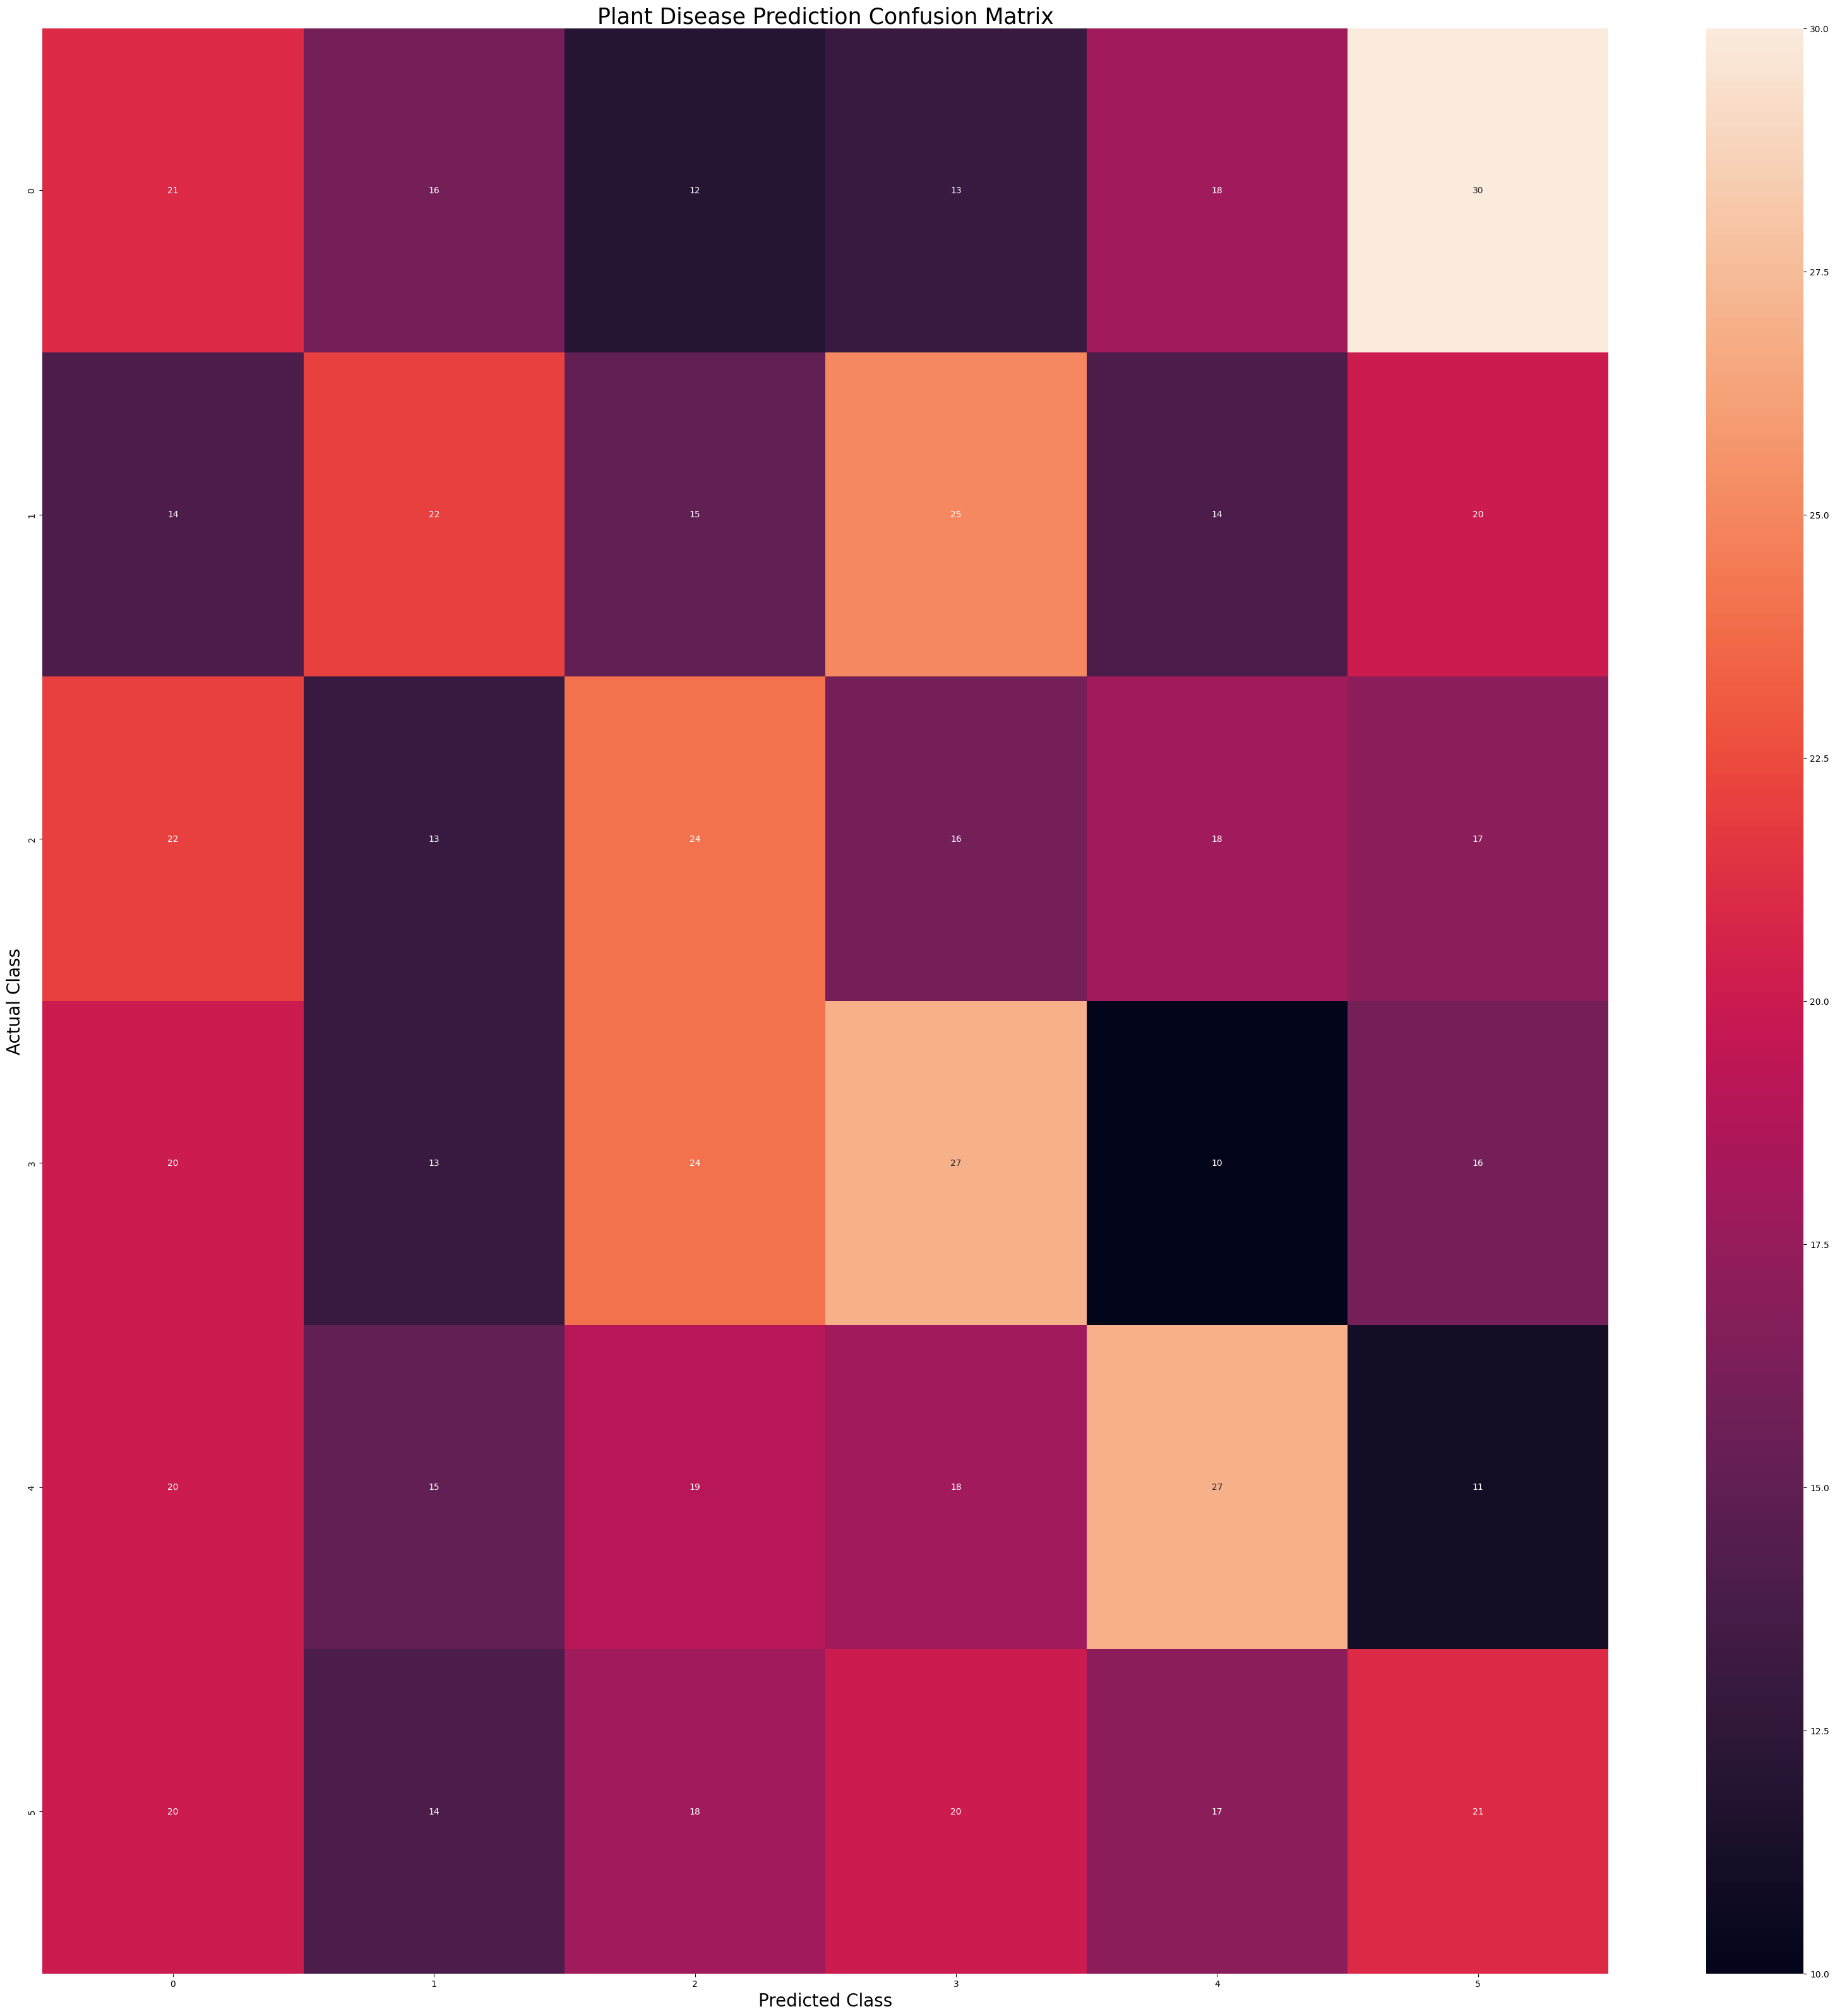

In [42]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()